In [ ]:
from scipy.integrate import odeint
import numpy as np
import pandas as pd
from random import sample
import matplotlib.pyplot as plt
%matplotlib inline
!pip install mpld3
import mpld3
mpld3.enable_notebook()

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 201 kB 4.4 MB/s 


In [ ]:
def deriv(y, t, N, beta11,beta12,beta22,beta21,V1, sigma):
    S1,S2, I1, I2 = y
    dS1dt = -(beta11*I1+beta12*I2)*(S1-V1)
    dS2dt = -(beta21*I1+beta22*I2)*S2
    dI1dt = (beta11*I1+beta12*I2)*(S1-V1)-sigma*I1
    dI2dt = (beta21*I1+beta22*I2)*S2-sigma*I2

    return dS1dt, dI1dt,dS2dt, dI2dt,

In [ ]:
def plotsir(t, S01,S02, I01,I02):
  f, ax = plt.subplots(1,1,figsize=(10,4))
  ax.plot(t, S01, 'b', alpha=0.7, linewidth=2, label='Susceptible1')
  ax.plot(t, S02, 'r', alpha=0.7, linewidth=2, label='Susceptible2')
  ax.plot(t, I01, 'y', alpha=0.7, linewidth=2, label='Infected1')
  ax.plot(t, I02, 'g', alpha=0.7, linewidth=2, label='Infected2')

  ax.set_xlabel('Time (days)')
  ax.yaxis.set_tick_params(length=0)
  ax.xaxis.set_tick_params(length=0)
  ax.grid(b=True, which='major', c='w', lw=2, ls='-')
  legend = ax.legend()
  legend.get_frame().set_alpha(0.5)
  for spine in ('top', 'right', 'bottom', 'left'):
      ax.spines[spine].set_visible(False)
  plt.show();

In [ ]:
""" gamma is a list of 1000 random number in (0,1) """

import random
sigma = []
for i in range(1000):
    sigma.append(random.uniform(0, 1))


In [ ]:

beta11= []
for i in range(1000):
    beta11.append(random.uniform(0, 2))


In [ ]:
beta22= []
for i in range(1000):
    beta22.append(random.uniform(0, 2))

In [ ]:
beta12= []
for i in range(1000):
    beta12.append(random.uniform(0, 2))

In [ ]:
beta21= []
for i in range(1000):
    beta21.append(random.uniform(0, 2))

In [ ]:
""" P, Q, M are the list of S, I, R respectievely calculated for 100 days for each of  1000 sets of parameter (beta,gamma)."""

P = []
Q = []
M = []
G = []
N = 1301
S01, I01, S02, I02 = 999, 1, 300,1  # initial conditions: one infected, rest susceptible
V1=0
y0 = S01, S02, I01, I02 # Initial conditions vector
t = np.linspace(0, 99, 100) # Grid of time points (in days)
for i in range(1000): #Plotted for 2 sets
    ret = odeint(deriv, y0, t, args=(N,beta11[i],beta12[i],beta22[i],beta21[i],V1, sigma[i]))
    S1, I1, S2, I2 = ret.T
    P.append(S1)
    Q.append(I1)
    M.append(S2)
    G.append(I2)

/usr/local/lib/python3.7/dist-packages/scipy/integrate/odepack.py:247: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)
/usr/local/lib/python3.7/dist-packages/scipy/integrate/odepack.py:247: ODEintWarning: Repeated error test failures (internal error). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)


In [ ]:
""" list to dataftrame """

S1_value = pd.DataFrame(P)
I1_value = pd.DataFrame(Q)
S2_value = pd.DataFrame(M)
I2_value = pd.DataFrame(G)

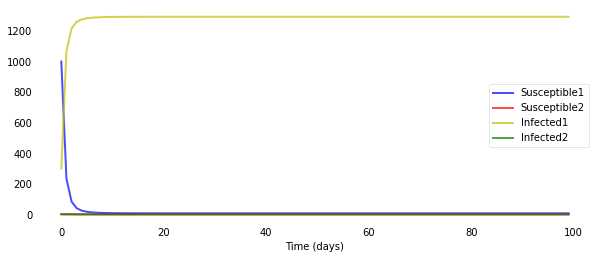

In [ ]:
plotsir(t, S1, S2, I1, I2)

In [ ]:
def ploti1i2(t, I1, I2):
  f, ax = plt.subplots(1,1,figsize=(10,4))
  ax.plot(t, I1, 'y', alpha=0.7, linewidth=2, label='Infected1')
  ax.plot(t, I2, 'r', alpha=0.7, linewidth=2, label='Infected2')

  ax.set_xlabel('Time (days)')
  ax.yaxis.set_tick_params(length=0)
  ax.xaxis.set_tick_params(length=0)
  ax.grid(b=True, which='major', c='w', lw=2, ls='-')
  legend = ax.legend()
  legend.get_frame().set_alpha(0.5)
  for spine in ('top', 'right', 'bottom', 'left'):
      ax.spines[spine].set_visible(False)
  plt.show();

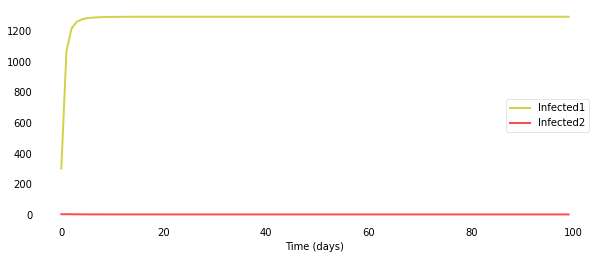

In [ ]:
ploti1i2(t,I1,I2)

In [ ]:


""" list to dataftrame """

S1_value = pd.DataFrame(P)
I1_value = pd.DataFrame(Q)
S2_value = pd.DataFrame(M)
I2_value = pd.DataFrame(G)

S_value=pd.concat([S1_value, S2_value])

In [ ]:
S_value.columns = range(S_value.shape[1])
S_value.head()

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,999.0,1.169021e+03,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,7.746824e-304,8.321425e-317,8.321552e-317,0.000000,7.746824e-304,8.321425e-317,4.782227e+50,3.818464e+180,3.421965e-210,6.217448e-311
1,999.0,-6.564069e-09,4.258885e-86,1.163054e-66,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
2,999.0,3.255417e+01,6.781966e+00,3.309830e+00,2.384115,2.051960,1.915890,1.856706,1.830253,1.818281,...,1.808253e+00,1.808253e+00,1.808253e+00,1.808253,1.808253e+00,1.808253e+00,1.808253e+00,1.808253e+00,1.808253e+00,1.808253e+00
3,999.0,1.349810e+02,6.348783e+01,4.776934e+01,42.909944,41.208513,40.584513,40.351647,40.264173,40.231233,...,4.021130e+01,4.021130e+01,4.021130e+01,40.211301,4.021130e+01,4.021130e+01,4.021130e+01,4.021130e+01,4.021130e+01,4.021130e+01
4,999.0,2.100100e-11,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00


In [ ]:


train  = S_value.iloc[0][0:70]
test  = S_value.iloc[0][70:]

In [ ]:
train = np.array(train).reshape(70,1)
test = np.array(test).reshape(30,1)


In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
scaler = MinMaxScaler()
# IGNORE WARNING ITS JUST CONVERTING TO FLOATS
# WE ONLY FIT TO TRAININ DATA, OTHERWISE WE ARE CHEATING ASSUMING INFO ABOUT TEST SET
scaler.fit(train)

MinMaxScaler()

In [ ]:
scaled_train = scaler.transform(train)
scaled_test = scaler.transform(test)

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.preprocessing.sequence import TimeseriesGenerator

In [ ]:
# define generator
n_input = 12
n_features = 1
generator = TimeseriesGenerator(scaled_train, scaled_train, length=n_input, batch_size=1)

In [ ]:
# What does the first batch look like?
X,y = generator[0]

In [ ]:
# define model
model = Sequential()
model.add(LSTM(64, activation='relu', input_shape=(n_input, n_features)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 64)                16896     
                                                                 
 dense (Dense)               (None, 1)                 65        
                                                                 
Total params: 16,961
Trainable params: 16,961
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# fit model
model.fit_generator(generator,epochs=50)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  


Epoch 1/50
58/58 [==============================] - 3s 10ms/step - loss: 4.8341e-07
Epoch 2/50
58/58 [==============================] - 1s 8ms/step - loss: 4.8568e-08
Epoch 3/50
58/58 [==============================] - 0s 8ms/step - loss: 2.3977e-09
Epoch 4/50
58/58 [==============================] - 1s 10ms/step - loss: 3.4384e-09
Epoch 5/50
58/58 [==============================] - 0s 8ms/step - loss: 2.7934e-09
Epoch 6/50
58/58 [==============================] - 0s 8ms/step - loss: 1.7220e-08
Epoch 7/50
58/58 [==============================] - 1s 9ms/step - loss: 2.7366e-08
Epoch 8/50
58/58 [==============================] - 1s 9ms/step - loss: 1.5655e-08
Epoch 9/50
58/58 [==============================] - 0s 7ms/step - loss: 8.6671e-09
Epoch 10/50
58/58 [==============================] - 0s 8ms/step - loss: 2.1960e-08
Epoch 11/50
58/58 [==============================] - 1s 10ms/step - loss: 1.2662e-07
Epoch 12/50
58/58 [==============================] - 1s 8ms/step - loss: 1.8938e-0

In [ ]:
model.history.history.keys()

dict_keys(['loss'])

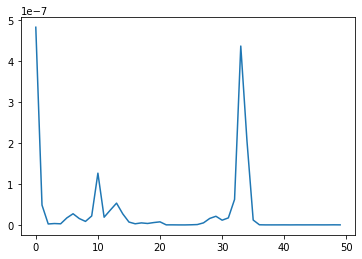

In [ ]:
loss_per_epoch = model.history.history['loss']
plt.plot(range(len(loss_per_epoch)),loss_per_epoch)

In [ ]:
scaled_test

array([[6.23695255e-307],
       [7.11849783e-320],
       [7.11849783e-320],
       [0.00000000e+000],
       [6.23694658e-307],
       [0.00000000e+000],
       [7.11849783e-320],
       [0.00000000e+000],
       [6.23847524e-307],
       [7.11849783e-320],
       [7.11849783e-320],
       [0.00000000e+000],
       [6.23695255e-307],
       [7.11849783e-320],
       [2.76676762e-322],
       [0.00000000e+000],
       [6.62675574e-307],
       [0.00000000e+000],
       [7.11849783e-320],
       [0.00000000e+000],
       [6.62676171e-307],
       [7.11849783e-320],
       [7.11849783e-320],
       [0.00000000e+000],
       [6.62676171e-307],
       [7.11849783e-320],
       [4.09079607e+047],
       [3.26637705e+177],
       [2.92720540e-213],
       [5.31850775e-314]])

In [ ]:
first_eval_batch = scaled_train[-12:]

In [ ]:
first_eval_batch

array([[0.0000000e+000],
       [0.0000000e+000],
       [0.0000000e+000],
       [0.0000000e+000],
       [0.0000000e+000],
       [6.6282844e-307],
       [7.1184978e-320],
       [0.0000000e+000],
       [6.6282844e-307],
       [7.1184978e-320],
       [7.1184978e-320],
       [0.0000000e+000]])

In [ ]:
first_eval_batch = first_eval_batch.reshape((1, n_input, n_features))

In [ ]:
model.predict(first_eval_batch)

array([[1.1453172e-05]], dtype=float32)

In [ ]:
scaled_test

array([[6.23695255e-307],
       [7.11849783e-320],
       [7.11849783e-320],
       [0.00000000e+000],
       [6.23694658e-307],
       [0.00000000e+000],
       [7.11849783e-320],
       [0.00000000e+000],
       [6.23847524e-307],
       [7.11849783e-320],
       [7.11849783e-320],
       [0.00000000e+000],
       [6.23695255e-307],
       [7.11849783e-320],
       [2.76676762e-322],
       [0.00000000e+000],
       [6.62675574e-307],
       [0.00000000e+000],
       [7.11849783e-320],
       [0.00000000e+000],
       [6.62676171e-307],
       [7.11849783e-320],
       [7.11849783e-320],
       [0.00000000e+000],
       [6.62676171e-307],
       [7.11849783e-320],
       [4.09079607e+047],
       [3.26637705e+177],
       [2.92720540e-213],
       [5.31850775e-314]])

In [ ]:
test_predictions = []

first_eval_batch = scaled_train[-n_input:]
current_batch = first_eval_batch.reshape((1, n_input, n_features))

for i in range(len(test)):

    # get prediction 1 time stamp ahead ([0] is for grabbing just the number instead of [array])
    current_pred = model.predict(current_batch)[0]

    # store prediction
    test_predictions.append(current_pred)

    # update batch to now include prediction and drop first value
    current_batch = np.append(current_batch[:,1:,:],[[current_pred]],axis=1)

In [ ]:
test_predictions

[array([1.1453172e-05], dtype=float32),
 array([1.1329306e-05], dtype=float32),
 array([1.124572e-05], dtype=float32),
 array([1.1189375e-05], dtype=float32),
 array([1.115154e-05], dtype=float32),
 array([1.1126162e-05], dtype=float32),
 array([1.1108932e-05], dtype=float32),
 array([1.1097174e-05], dtype=float32),
 array([1.1089258e-05], dtype=float32),
 array([1.1084019e-05], dtype=float32),
 array([1.108041e-05], dtype=float32),
 array([1.1077966e-05], dtype=float32),
 array([1.1076103e-05], dtype=float32),
 array([1.1076569e-05], dtype=float32),
 array([1.1076685e-05], dtype=float32),
 array([1.1076685e-05], dtype=float32),
 array([1.10768015e-05], dtype=float32),
 array([1.10768015e-05], dtype=float32),
 array([1.10768015e-05], dtype=float32),
 array([1.10768015e-05], dtype=float32),
 array([1.10768015e-05], dtype=float32),
 array([1.10768015e-05], dtype=float32),
 array([1.10768015e-05], dtype=float32),
 array([1.10768015e-05], dtype=float32),
 array([1.10768015e-05], dtype=floa

In [ ]:
true_predictions = scaler.inverse_transform(test_predictions)

In [ ]:
true_predictions

array([[0.013389  ],
       [0.0132442 ],
       [0.01314648],
       [0.01308062],
       [0.01303639],
       [0.01300672],
       [0.01298658],
       [0.01297283],
       [0.01296358],
       [0.01295745],
       [0.01295323],
       [0.01295038],
       [0.0129482 ],
       [0.01294874],
       [0.01294888],
       [0.01294888],
       [0.01294901],
       [0.01294901],
       [0.01294901],
       [0.01294901],
       [0.01294901],
       [0.01294901],
       [0.01294901],
       [0.01294901],
       [0.01294901],
       [0.01294901],
       [0.01294901],
       [0.01294901],
       [0.01294901],
       [0.01294901]])